In [51]:
import pandas as pd
import numpy as np

In [52]:
data = pd.read_csv("Data.csv")
print(data)

    Id    Age  Income  Gender Marital_status Buys
0    1    <21    High    Male         Single   No
1    2    <21    High    Male        Married   No
2    3  21-35    high    male         Single  Yes
3    4    >35  Medium    male         Single  Yes
4    5    >35     Low  Female         Single  Yes
5    6    >35     Low  Female        Married   No
6    7  21-35     Low  Female        Married  Yes
7    8    <21  Medium    Male         Single   No
8    9    <21     Low  Female        Married  Yes
9   10    >35  Medium  Female         Single  Yes
10  11    <21  Medium  Female        Married  Yes
11  12  21-35  Medium    Male        Married  Yes
12  13  21-35    High  Female         Single  Yes
13  14    >35  Medium    Male        Married   No


In [53]:
x = data.iloc[: , 1:-1]
y = data.iloc[: , -1]
print(x)
print("---------------------------------------------")
print(y)

      Age  Income  Gender Marital_status
0     <21    High    Male         Single
1     <21    High    Male        Married
2   21-35    high    male         Single
3     >35  Medium    male         Single
4     >35     Low  Female         Single
5     >35     Low  Female        Married
6   21-35     Low  Female        Married
7     <21  Medium    Male         Single
8     <21     Low  Female        Married
9     >35  Medium  Female         Single
10    <21  Medium  Female        Married
11  21-35  Medium    Male        Married
12  21-35    High  Female         Single
13    >35  Medium    Male        Married
---------------------------------------------
0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object


In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [55]:
x = x.apply(labelencoder.fit_transform)  # perform label Encoding
print(x)

    Age  Income  Gender  Marital_status
0     1       0       1               1
1     1       0       1               0
2     0       3       2               1
3     2       2       2               1
4     2       1       0               1
5     2       1       0               0
6     0       1       0               0
7     1       2       1               1
8     1       1       0               0
9     2       2       0               1
10    1       2       0               0
11    0       2       1               0
12    0       0       0               1
13    2       2       1               0


In [56]:
from sklearn.tree import DecisionTreeClassifier  #trained the algorihm using given data
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [57]:
# predict the value on given expression
x_in = np.array([1,1,0,0])

In [58]:
y_pred = classifier.predict([x_in])
print(y_pred)

['Yes']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
# from six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# #import pydotplus


[Text(0.375, 0.9, 'Age <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.5, 0.7, 'Gender <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.25, 0.5, 'Age <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.375, 0.3, 'Marital_status <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.75, 0.5, 'Gender <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

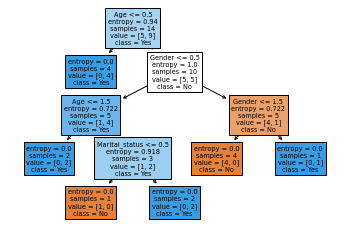

In [60]:
from sklearn.tree import plot_tree
plot_tree(classifier,  feature_names=x.columns, class_names=["No","Yes"],filled="true",)
